📘 SECTION 1: Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import io
from google.colab import files


📘 SECTION 2: Upload and Load Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Upload dataset
uploaded = files.upload()

# Get uploaded filename dynamically
file_name = next(iter(uploaded))

# Load Excel file
df = pd.read_excel(io.BytesIO(uploaded[file_name]), engine='openpyxl')

# Display first few rows
df.head()


Saving Dataset_AQI4-5 (2).xlsx to Dataset_AQI4-5 (2).xlsx


,City,AQI,PM2.5,PM10,O3,NO2,SO2,CO,Latitude,Longitude,Time
0,"Gulzarpet, Anantapur, India",88,88.0,71.0,26.3,4.6,2.4,6.5,14.675886,77.593027,2024-05-04 18:00:00
1,"Anand Kala Kshetram, Rajamahendravaram, India",58,58.0,45.0,14.6,12.0,6.9,6.7,16.987287,81.736318,2024-05-04 18:00:00
2,"Tirumala-APPCB, Tirupati, India",110,110.0,53.0,15.0,13.8,1.8,9.0,13.670000,79.350000,2024-05-04 18:00:00
3,"PWD Grounds, Vijayawada, India",-,52.0,NaN,5.1,0.7,4.9,4.2,16.507014,80.627767,2020-11-19 16:00:00
4,"Naharlagun, Naharlagun, India",53,53.0,18.0,1.0,1.1,1.6,2.4,27.103358,93.679645,2024-05-04 09:00:00


📘 SECTION 3: Clean and Prepare Data



In [ ]:
# Replace invalid AQI values and convert to numeric
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

# Drop rows with missing AQI
df = df.dropna(subset=['AQI'])

# Drop unnecessary columns
df = df.drop(['City', 'Latitude', 'Longitude', 'Time'], axis=1)

# Fill other missing values with column means
df = df.fillna(df.mean(numeric_only=True))


📘 SECTION 4: Define AQI Categories for Classification


In [ ]:
def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Apply categorization
df['AQI_Category'] = df['AQI'].apply(aqi_category)


📘 SECTION 5: Train/Test Split and Feature Scaling



In [ ]:
# Split into features and labels
X = df.drop(['AQI', 'AQI_Category'], axis=1)
y = df['AQI_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


📘 SECTION 6: Train Classification Model



In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)


📘 SECTION 7: Evaluate Model



Accuracy: 0.7741935483870968

Classification Report:
                                 precision    recall  f1-score   support

                          Good       1.00      0.25      0.40         4
                     Hazardous       0.00      0.00      0.00         1
                      Moderate       0.84      1.00      0.91        16
                     Unhealthy       0.67      0.80      0.73         5
Unhealthy for Sensitive Groups       0.60      0.75      0.67         4
                Very Unhealthy       0.00      0.00      0.00         1

                      accuracy                           0.77        31
                     macro avg       0.52      0.47      0.45        31
                  weighted avg       0.75      0.77      0.73        31



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


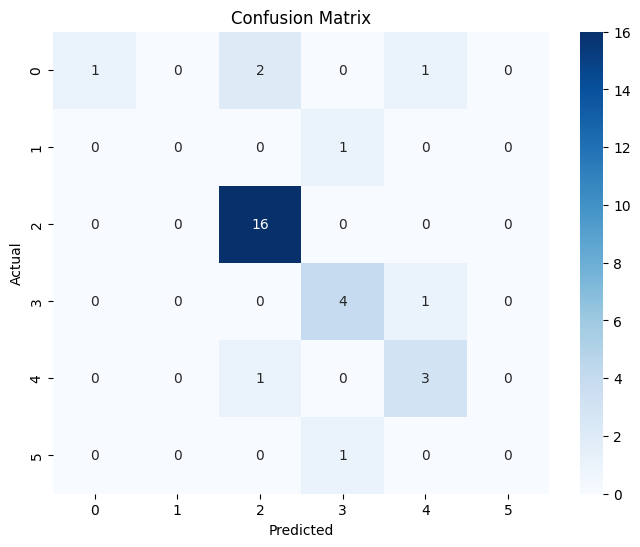

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



📘 SECTION 8: Save Model and Scaler



In [ ]:
joblib.dump(model, 'aqi_rf_model.pkl')
joblib.dump(scaler, 'aqi_scaler.pkl')
print("✅ Model and scaler saved for future deployment.")


✅ Model and scaler saved for future deployment.


📘 SECTION 9: Download Saved Files (Optional)



In [ ]:
files.download('aqi_rf_model.pkl')
files.download('aqi_scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the uploaded Excel file using pandas
import io

# Extract the file name dynamically
file_name = next(iter(uploaded))

# Read the Excel file (openpyxl engine is required)
df = pd.read_excel(io.BytesIO(uploaded[file_name]), engine='openpyxl')

# Display first few rows to verify successful load
df.head()


,City,AQI,PM2.5,PM10,O3,NO2,SO2,CO,Latitude,Longitude,Time
0,"Gulzarpet, Anantapur, India",88,88.0,71.0,26.3,4.6,2.4,6.5,14.675886,77.593027,2024-05-04 18:00:00
1,"Anand Kala Kshetram, Rajamahendravaram, India",58,58.0,45.0,14.6,12.0,6.9,6.7,16.987287,81.736318,2024-05-04 18:00:00
2,"Tirumala-APPCB, Tirupati, India",110,110.0,53.0,15.0,13.8,1.8,9.0,13.670000,79.350000,2024-05-04 18:00:00
3,"PWD Grounds, Vijayawada, India",-,52.0,NaN,5.1,0.7,4.9,4.2,16.507014,80.627767,2020-11-19 16:00:00
4,"Naharlagun, Naharlagun, India",53,53.0,18.0,1.0,1.1,1.6,2.4,27.103358,93.679645,2024-05-04 09:00:00


📘 Section 10: Deployment Using Gradio


In [ ]:
# Install Gradio (run only once)
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load the saved model and scaler
model = joblib.load('aqi_rf_model.pkl')
scaler = joblib.load('aqi_scaler.pkl')

# Define prediction function
def predict_aqi(pm25, pm10, o3, no2, so2, co):
    # Prepare input as DataFrame
    input_data = pd.DataFrame([[pm25, pm10, o3, no2, so2, co]],
                              columns=['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO'])

    # Scale input
    scaled_input = scaler.transform(input_data)

    # Predict
    prediction = model.predict(scaled_input)[0]
    return f"Predicted AQI Category: {prediction}"


In [ ]:
# Define Gradio interface
iface = gr.Interface(
    fn=predict_aqi,
    inputs=[
        gr.Number(label="PM2.5"),
        gr.Number(label="PM10"),
        gr.Number(label="O3"),
        gr.Number(label="NO2"),
        gr.Number(label="SO2"),
        gr.Number(label="CO")
    ],
    outputs=gr.Textbox(label="AQI Prediction"),
    title="🌫️ Air Quality Level Predictor",
    description="Enter air pollutant levels to predict the AQI category using a trained machine learning model."
)

# Launch the app
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8b4a0881b59a57c529.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
